In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime
import plotly.express as px

In [292]:

path = '../../../Atliq Marts Challenge'
fact_order_lines_df=pd.read_csv(path+"/fact_order_lines.csv")
# fact_orders_aggregate_df=pd.read_csv("Atliq Marts Challenge/fact_orders_aggregate.csv")

dim_date=pd.read_csv(path+"/dim_date.csv")
dim_customers=pd.read_csv(path+"/dim_customers.csv")
dim_products=pd.read_csv(path+"/dim_products.csv")
dim_targets_orders=pd.read_csv(path+"/dim_targets_orders.csv")

dim_date=pd.read_csv(path+"/dim_date.csv")

dim_date = dim_date.rename(columns={'date': 'agreed_delivery_date','mmm_yy': 'agreed_delivery_mmm_yy','week_no': 'agreed_delivery_week_no'})




In [293]:
# result =  pd.concat([fact_order_lines_df, fact_orders_aggregate_df], axis=1,join="outer")
# result =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
# esult =pd.merge( fact_order_lines_df, fact_orders_aggregate_df, on=["order_id", "customer_id"])
result =pd.merge( fact_order_lines_df ,dim_customers , how="outer",on=["customer_id"])
result =pd.merge( result ,dim_products , how="outer",on=["product_id"])
train_SC =pd.merge( result ,dim_targets_orders , how="outer",on=["customer_id"])
train_SC =pd.merge( result ,dim_date , how="outer",on=["agreed_delivery_date"])


In [294]:
train_SC.columns = [col.lower().replace(' ', '_') for col in train_SC.columns]
train_SC.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
train_SC.rename(columns=lambda x: x.replace("%", "_percent"), inplace=True)

In [295]:
train_SC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57097 entries, 0 to 57096
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 57096 non-null  object 
 1   order_placement_date     57096 non-null  object 
 2   customer_id              57096 non-null  float64
 3   product_id               57096 non-null  float64
 4   order_qty                57096 non-null  float64
 5   agreed_delivery_date     57097 non-null  object 
 6   actual_delivery_date     57096 non-null  object 
 7   delivery_qty             57096 non-null  float64
 8   in_full                  57096 non-null  float64
 9   on_time                  57096 non-null  float64
 10  on_time_in_full          57096 non-null  float64
 11  customer_name            57096 non-null  object 
 12  city                     57096 non-null  object 
 13  product_name             57096 non-null  object 
 14  category              

In [296]:
df = train_SC[((train_SC['city'] == 'Ahmedabad') & train_SC['product_id'] == 25891201)|(train_SC['product_id'] == 25891202)|(train_SC['product_id'] == 25891203)] 

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6397 entries, 0 to 56969
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 6397 non-null   object 
 1   order_placement_date     6397 non-null   object 
 2   customer_id              6397 non-null   float64
 3   product_id               6397 non-null   float64
 4   order_qty                6397 non-null   float64
 5   agreed_delivery_date     6397 non-null   object 
 6   actual_delivery_date     6397 non-null   object 
 7   delivery_qty             6397 non-null   float64
 8   in_full                  6397 non-null   float64
 9   on_time                  6397 non-null   float64
 10  on_time_in_full          6397 non-null   float64
 11  customer_name            6397 non-null   object 
 12  city                     6397 non-null   object 
 13  product_name             6397 non-null   object 
 14  category               

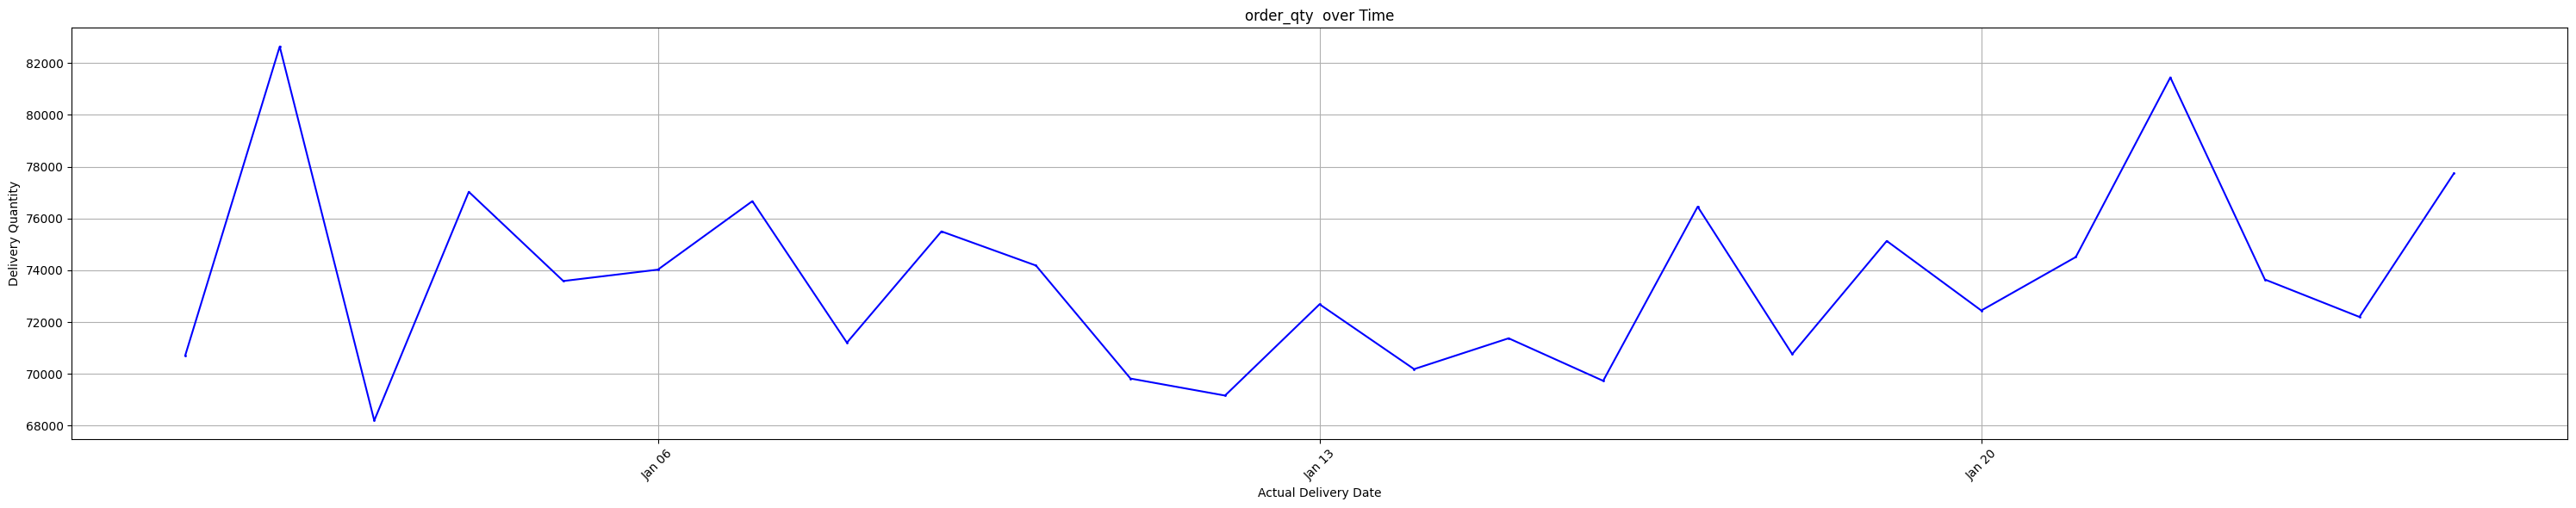

In [298]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming selected_rows is your DataFrame

# Convert 'actual_delivery_date' to datetime format

df['agreed_delivery_date_formatted'] = pd.to_datetime(df['agreed_delivery_date'], format='%d-%b-%y')
df = df.sort_values(by='agreed_delivery_date_formatted')

df = df.groupby('agreed_delivery_week_no')['order_qty'].sum().reset_index()[1:-1]

# df2['agreed_delivery_date_formatted'] = pd.to_datetime(df2['actual_delivery_date'], format='%d-%b-%y')
# df_sorted_actual_delivery_date2 = df2.sort_values(by='agreed_delivery_date_formatted')

# df3['agreed_delivery_date_formatted'] = pd.to_datetime(df3['actual_delivery_date'], format='%d-%b-%y')
# df_sorted_actual_delivery_date3 = df3.sort_values(by='agreed_delivery_date_formatted')
# Sort DataFrame by 'agreed_delivery_date_formatted'


# Plot
plt.figure(figsize=(30, 6))
plt.plot(df['agreed_delivery_week_no'], df['order_qty'], color='blue', marker='o', linestyle='-', markersize=1)
plt.title('order_qty  over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)

# Set x-axis major ticks to represent weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [299]:
# df =df_sorted_actual_delivery_date

In [300]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


arima_model = ARIMA(df['order_qty'], order=(10, 0, 10),seasonal_order=(3, 0, 3, 12))
arima_results = arima_model.fit()

# Obtain ARIMA forecasts
arima_forecast = arima_results.forecast(steps=len(df))
arima_forecast.index = df.index
# Add ARIMA forecasts as additional feature
df['arima_forecast'] = arima_forecast

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming selected_rows is your DataFrame






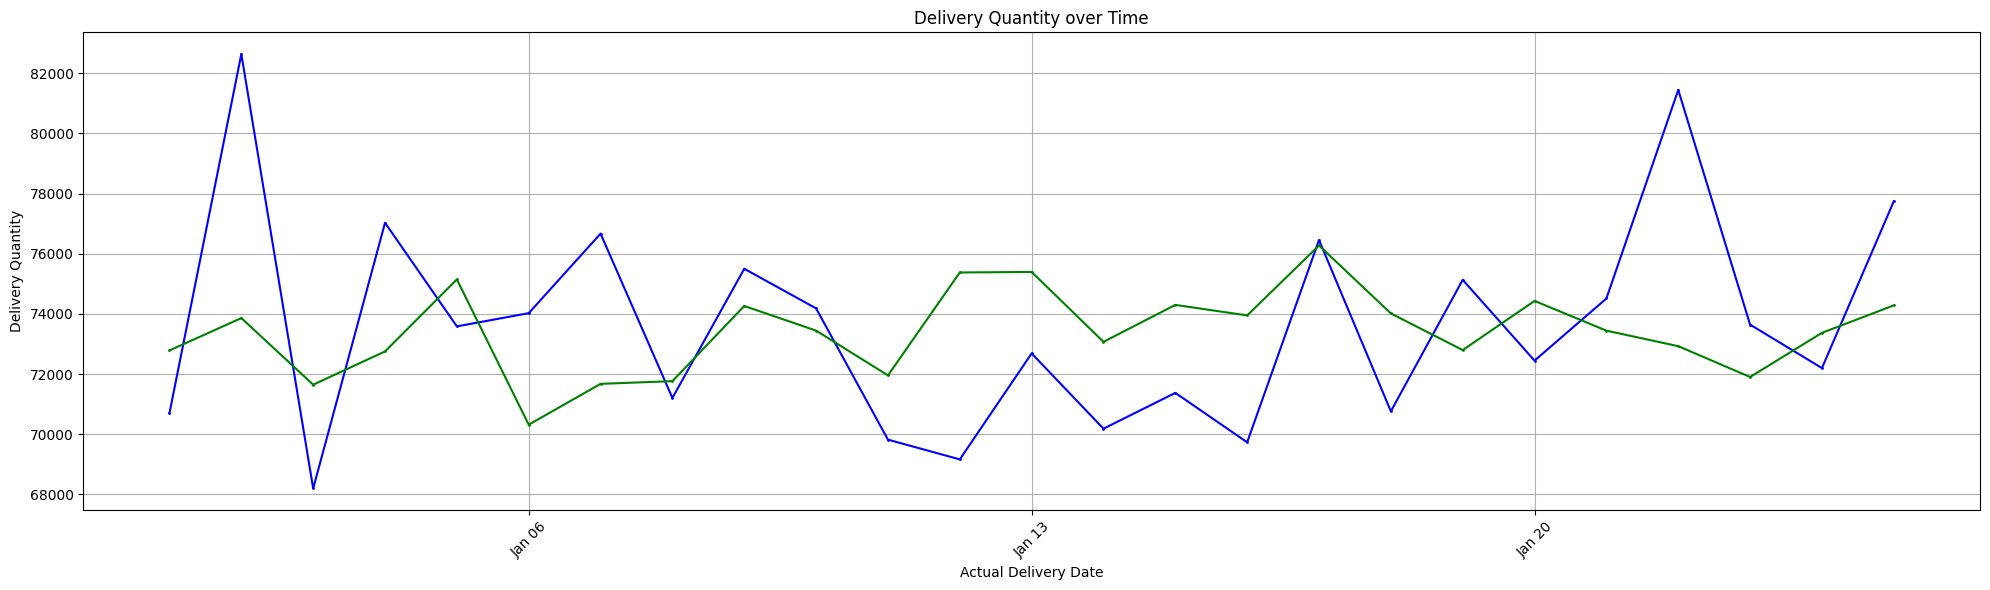

In [301]:
# Plot
plt.figure(figsize=(20, 6))
plt.plot(df['agreed_delivery_week_no'], df['order_qty'], color='blue', marker='o', linestyle='-', markersize=1)
plt.plot(df['agreed_delivery_week_no'], df['arima_forecast'], color='green', marker='o', linestyle='-', markersize=1)
plt.title('Delivery Quantity over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)

# Set x-axis major ticks to represent weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [302]:
df

,agreed_delivery_week_no,order_qty,arima_forecast
1,W 11,70706.0,72786.569571
2,W 12,82639.0,73861.967383
3,W 13,68199.0,71647.826426
4,W 14,77030.0,72752.898925
5,W 15,73586.0,75147.459392
6,W 16,74025.0,70318.452239
7,W 17,76670.0,71675.559034
8,W 18,71206.0,71765.500709
9,W 19,75502.0,74264.601962
10,W 20,74184.0,73445.290916


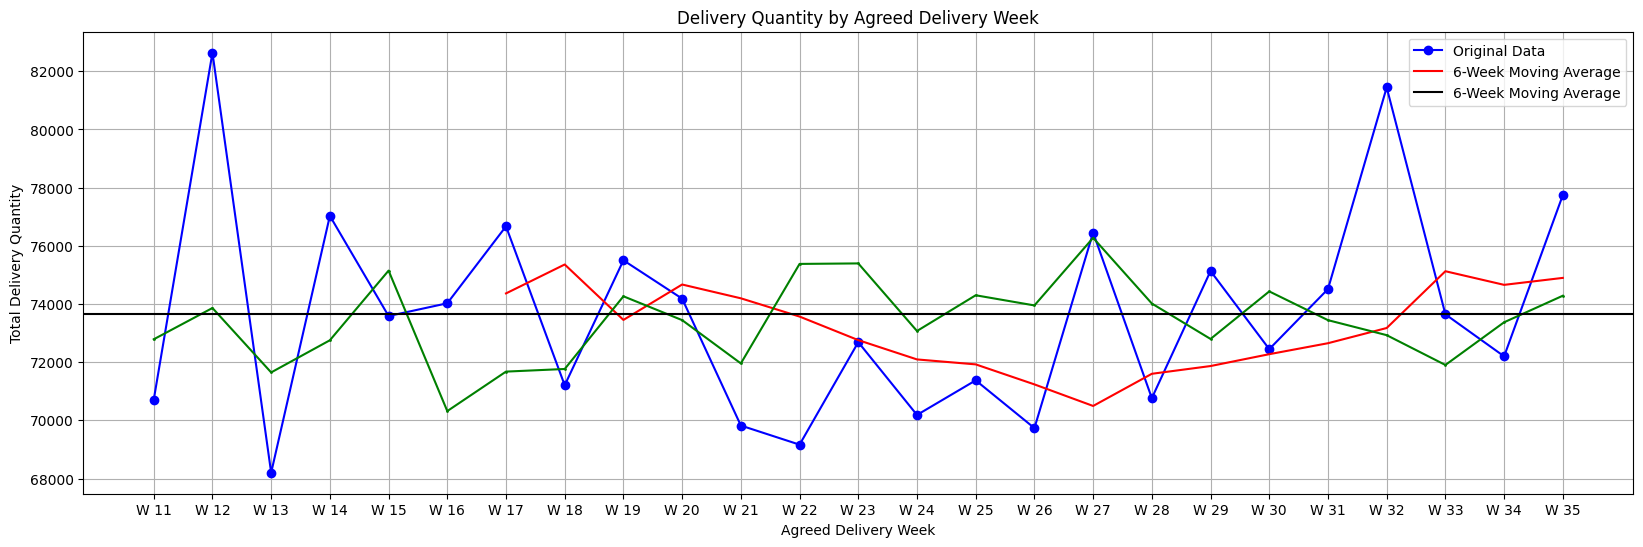

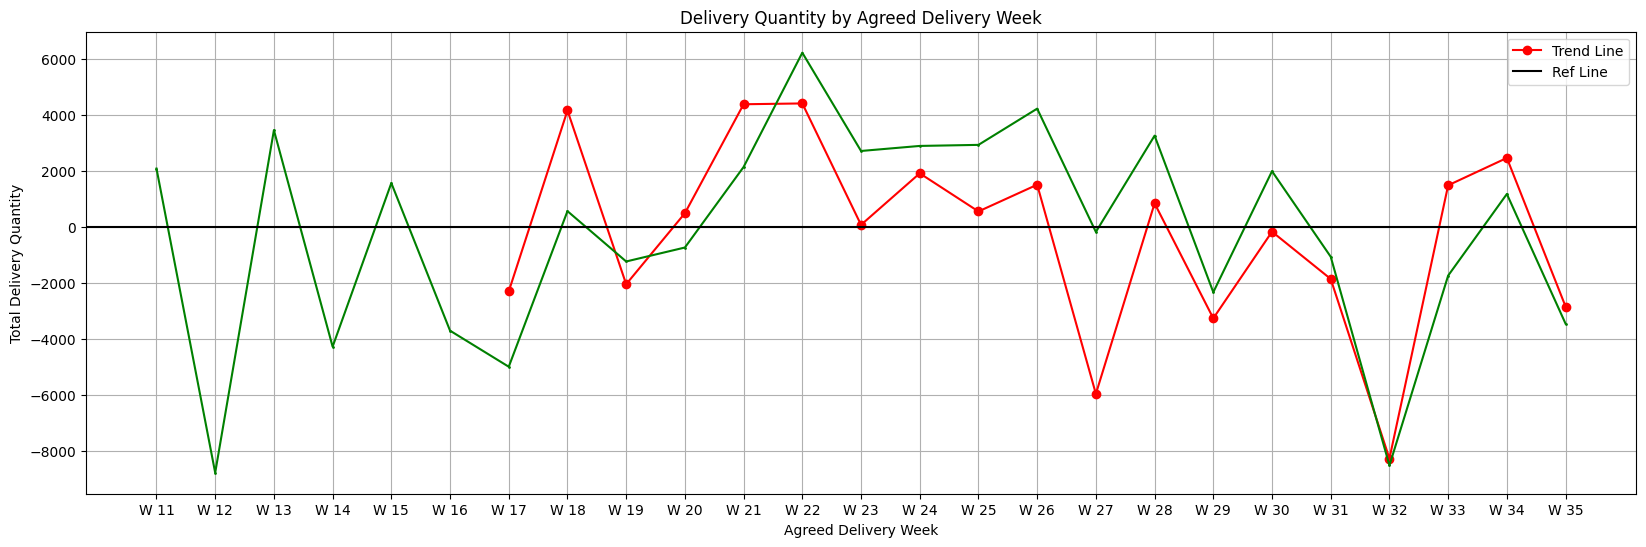

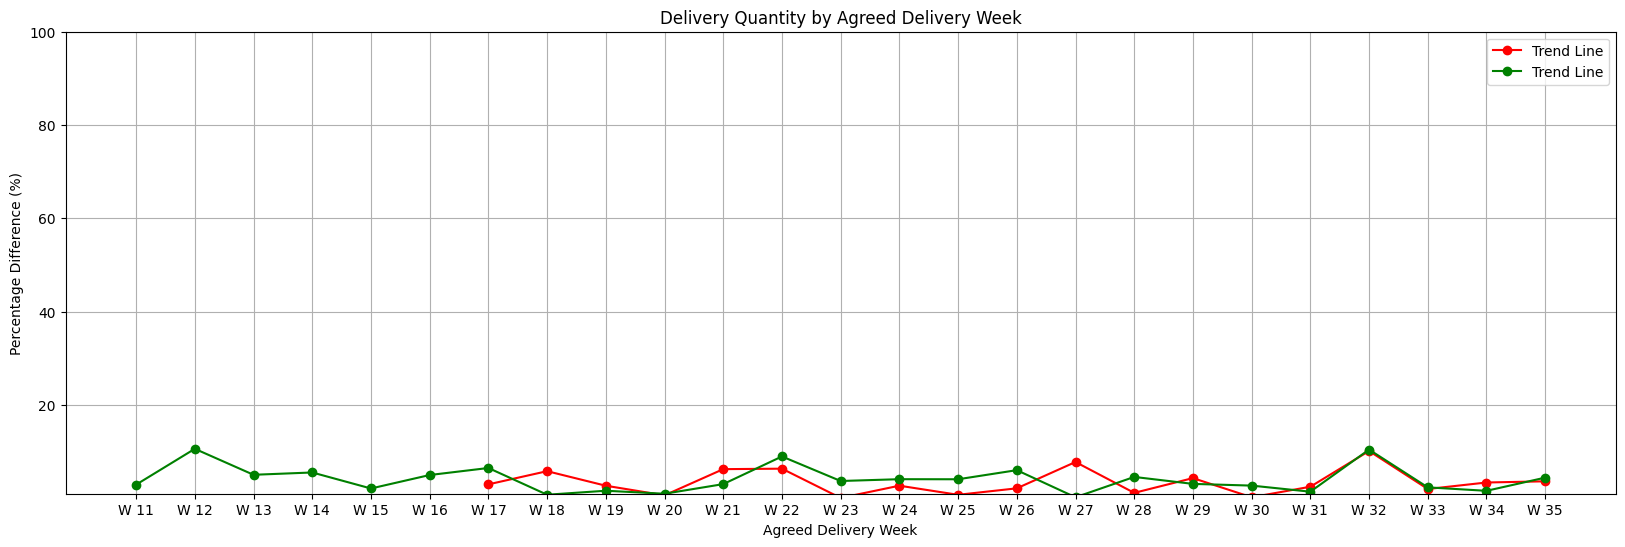

In [306]:
# Calculate moving average
df['moving_avg'] = df['order_qty'].rolling(window=6).mean().shift(1)

mean = df['order_qty'].mean()
# df['Navive'] = 2*mean-df['moving_avg2']

# Original data
plt.figure(figsize=(20, 6))
plt.plot(df['agreed_delivery_week_no'], df['order_qty'], color='blue', marker='o', linestyle='-', label='Original Data')
plt.plot(df['agreed_delivery_week_no'], df['moving_avg'], color='red', linestyle='-', label='6-Week Moving Average')
plt.plot(df['agreed_delivery_week_no'], df['arima_forecast'], color='green', marker='o', linestyle='-', markersize=1)
plt.axhline(y=mean , color='black', linestyle='-', label='6-Week Moving Average')
plt.title('Delivery Quantity by Agreed Delivery Week')
plt.xlabel('Agreed Delivery Week')
plt.ylabel('Total Delivery Quantity')
plt.grid(True)
plt.legend()  # Show legend
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(df['agreed_delivery_week_no'],df['moving_avg']-df['order_qty'], color='red', marker='o', linestyle='-', label='Trend Line')
plt.plot(df['agreed_delivery_week_no'], df['arima_forecast']-df['order_qty'], color='green', marker='o', linestyle='-', markersize=1)
plt.axhline(y=0, color='black', linestyle='-', label='Ref Line')
plt.title('Delivery Quantity by Agreed Delivery Week')
plt.xlabel('Agreed Delivery Week')
plt.ylabel('Total Delivery Quantity')
plt.grid(True)
plt.legend()  # Show legend
plt.show()
plt.figure(figsize=(20, 6))
plt.plot(df['agreed_delivery_week_no'], (abs(df['moving_avg'] - df['order_qty']) / df['order_qty']) * 100, color='red', marker='o', linestyle='-', label='Trend Line')
plt.plot(df['agreed_delivery_week_no'], (abs(df['arima_forecast'] - df['order_qty']) / df['order_qty']) * 100, color='green', marker='o', linestyle='-', label='Trend Line')
plt.title('Delivery Quantity by Agreed Delivery Week')
plt.xlabel('Agreed Delivery Week')
plt.ylabel('Percentage Difference (%)')  # Updated ylabel
plt.grid(True)
plt.legend()  # Show legend
plt.ylim(1, 100)  # Set y-axis limits
plt.show()

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   agreed_delivery_week_no  25 non-null     object 
 1   order_qty                25 non-null     float64
 2   arima_forecast           25 non-null     float64
 3   moving_avg               19 non-null     float64
dtypes: float64(3), object(1)
memory usage: 932.0+ bytes


In [305]:
 #Split data into features and target variable (if applicable)


# Define predictors and target variable
# X = df[['customer_id', 'product_id', 'delivery_qty', 'in_full', 'on_time', 'on_time_in_full',
#         'ontime_target_percent', 'infull_target_percent', 'otif_target_percent',
#         'order_placement_month', 'order_placement_day', 'order_placement_dayofweek', 'arima_forecast']]
X= df.drop(columns=['order_qty']) 
y = df['order_qty']

# Split data into train and test sets

# Split the data into train and test sets, leaving out the last 200 rows
X_train, X_test = X.iloc[:-20], X.iloc[-20:]
y_train, y_test = y.iloc[:-20], y.iloc[-20:]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_traino =X_train
X_train=X_train[['customer_id', 'product_id', 'in_full', 'on_time', 'on_time_in_full',
        'ontime_target_percent', 'infull_target_percent', 'otif_target_percent',
        'order_placement_month', 'order_placement_day', 'order_placement_dayofweek', 'arima_forecast']]

X_testo =X_test
X_test=X_test[['customer_id', 'product_id', 'in_full', 'on_time', 'on_time_in_full',
        'ontime_target_percent', 'infull_target_percent', 'otif_target_percent',
        'order_placement_month', 'order_placement_day', 'order_placement_dayofweek', 'arima_forecast']]


# Train the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
dfx =pd.DataFrame({"Actual": y_test, "Predict": y_pred})


KeyError: "['customer_id', 'product_id', 'in_full', 'on_time', 'on_time_in_full', 'ontime_target_percent', 'infull_target_percent', 'otif_target_percent', 'order_placement_month', 'order_placement_day', 'order_placement_dayofweek'] not in index"

In [ ]:
dfx

,Actual,Predict
52426,444,381.926866
52427,469,366.844432
52428,379,372.443515
52429,404,349.193448
52430,489,363.416157
52431,415,433.920095
52432,492,422.447552
52433,491,418.001429
52434,442,422.479568
52435,371,403.416020


In [ ]:
dfx = pd.concat([X_testo,dfx], axis=1)
dfx=dfx.reset_index(drop=True)

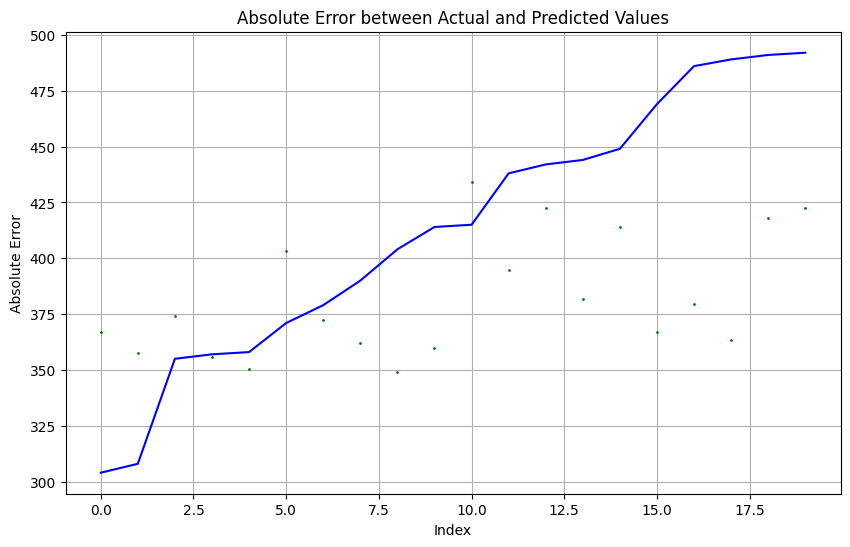

In [ ]:
# Sort the DataFrame based on absolute error
df_sorted_Actual = dfx.sort_values(by='Actual')



df_sorted_Actual = df_sorted_Actual.reset_index(drop=True)
plt.figure(figsize=(10, 6))

plt.plot(df_sorted_Actual['Predict'] ,color='green', marker='o', linestyle='', markersize=1)
plt.plot(df_sorted_Actual['Actual'], color='blue', label='Actual')

plt.title('Absolute Error between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

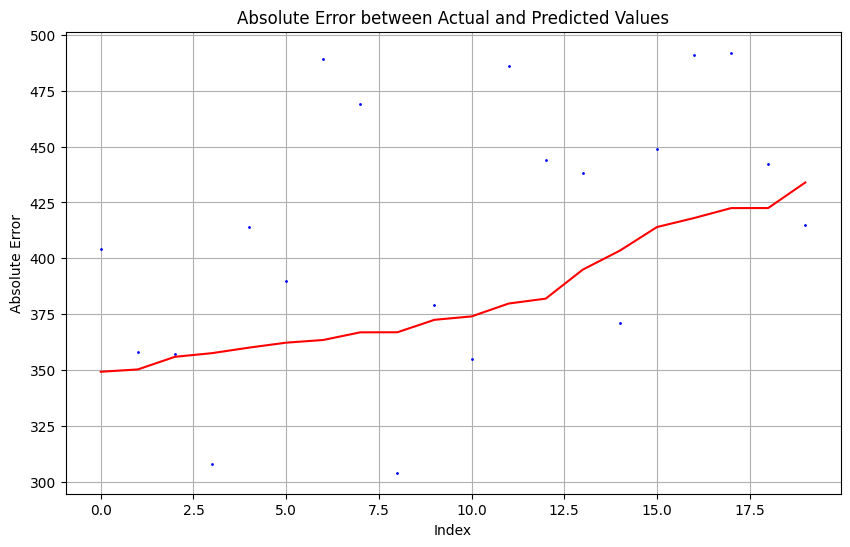

In [ ]:
# Sort the DataFrame based on absolute error
df_sorted_Predict = dfx.sort_values(by='Predict')

x1=df_sorted_Predict['Actual'].to_numpy()
x2=df_sorted_Predict['Predict'].to_numpy()


plt.figure(figsize=(10, 6))
plt.plot(x1 ,color='blue', marker='o', linestyle='', markersize=1, label='Actual')
plt.plot(x2, color='red', label='Predict')

plt.title('Absolute Error between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

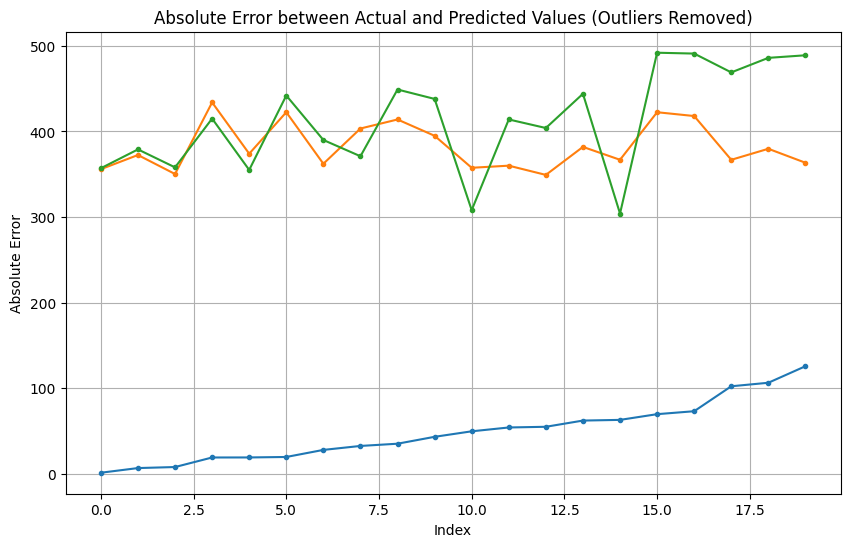

In [ ]:
dfx['Abs_Error'] = abs(dfx['Actual'] - dfx['Predict'])

# Sort the DataFrame based on absolute error
df_sorted = dfx.sort_values(by='Abs_Error')

x1=df_sorted['Actual'].to_numpy()
x2=df_sorted['Predict'].to_numpy()
x3=df_sorted['Abs_Error'].to_numpy()
plt.figure(figsize=(10, 6))
plt.plot(x3, marker='.')
plt.plot(x2, marker='.')
plt.plot(x1, marker='.')
plt.title('Absolute Error between Actual and Predicted Values (Outliers Removed)')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming selected_rows is your DataFrame

# Convert 'actual_delivery_date' to datetime format
selected_rows['agreed_delivery_date_formatted'] = pd.to_datetime(selected_rows['actual_delivery_date'], format='%d-%b-%y')

# Sort DataFrame by 'agreed_delivery_date_formatted'
df_sorted_actual_delivery_date = selected_rows.sort_values(by='agreed_delivery_date_formatted')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_actual_delivery_date['agreed_delivery_date_formatted'], df_sorted_actual_delivery_date['order_qty'], color='blue', marker='o', linestyle='-', markersize=1)
plt.plot(dfx['agreed_delivery_date_formatted'], dfx['Actual'], color='red', marker='o', linestyle='-', markersize=1)
plt.plot(dfx['agreed_delivery_date_formatted'], dfx['Predict'], color='green', marker='o', linestyle='-', markersize=1)
plt.title('Delivery Quantity over Time')
plt.xlabel('Actual Delivery Date')
plt.ylabel('Delivery Quantity')
plt.grid(True)

# Set x-axis major ticks to represent weeks
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

NameError: name 'selected_rows' is not defined